In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv")
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5573, 2)

# 1. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5573 non-null   object
 1   v2      5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# renaming the columns
df.rename(columns = {'v1' : 'target', 'v2' : 'message'}, inplace = True)
df.sample(5)

,target,message
3780,ham,Then ur physics get a-?
5294,ham,I donno its in your genes or something
291,ham,Haf u found him? I feel so stupid da v cam was...
3922,ham,"Oh really? perform, write a paper, go to a mov..."
1101,ham,"Yeah go on then, bored and depressed sittin wa..."


In [6]:
df['target'] = df.target.apply(lambda x : 1 if x == 'ham' else 0)

In [7]:
df.sample(3)

,target,message
5006,1,ILL B DOWN SOON
1804,1,The bus leaves at &lt;#&gt;
5275,1,"Hi. Hope ur day * good! Back from walk, table ..."


ham = 1

spam = 0

In [8]:
# missing values
df.isnull().sum()

target     0
message    0
dtype: int64

In [9]:
# check for duplicate values
df.duplicated().sum()

400

In [10]:
# remove duplicates
df = df.drop_duplicates(keep = 'first')

In [11]:
df.duplicated().sum()

0

# 2. EDA

In [12]:
df.target.value_counts()

1    4520
0     653
Name: target, dtype: int64

In [13]:
df.groupby('target').describe()

message                                                               
         count unique                                                top freq
target                                                                       
0          653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1
1         4520   4520  Go until jurong point, crazy.. Available only ...    1

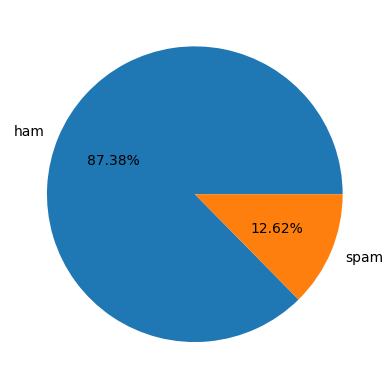

In [14]:
import matplotlib.pyplot as plt
plt.pie(df.target.value_counts(), labels= ['ham', 'spam'], autopct = '%.2f%%');

In [15]:
# Data imbalance

In [16]:
import nltk  #natural language toolkit

In [17]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [18]:
df['num_characters'] = df.message.apply(len)

In [19]:
# num of words
df['num_words'] = df.message.apply(lambda x : len(nltk.word_tokenize(x)))

In [20]:
# num of sentence
df['num_sentences'] = df.message.apply(lambda x : len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,target,message,num_characters,num_words,num_sentences
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,Ok lar... Joking wif u oni...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,1,U dun say so early hor... U c already then say...,49,13,1
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5173.000000,5173.000000,5173.000000
mean,79.484052,18.592306,1.972936
std,58.383102,13.378331,1.457586
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
df[df['target'] == 1][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4520.000000,4520.000000,4520.000000
mean,71.067699,17.269912,1.826549
std,56.672274,13.563100,1.392613
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
df[df['target'] == 0][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.741194,27.745789,2.986217
std,29.798383,6.979572,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [25]:
import seaborn as sb

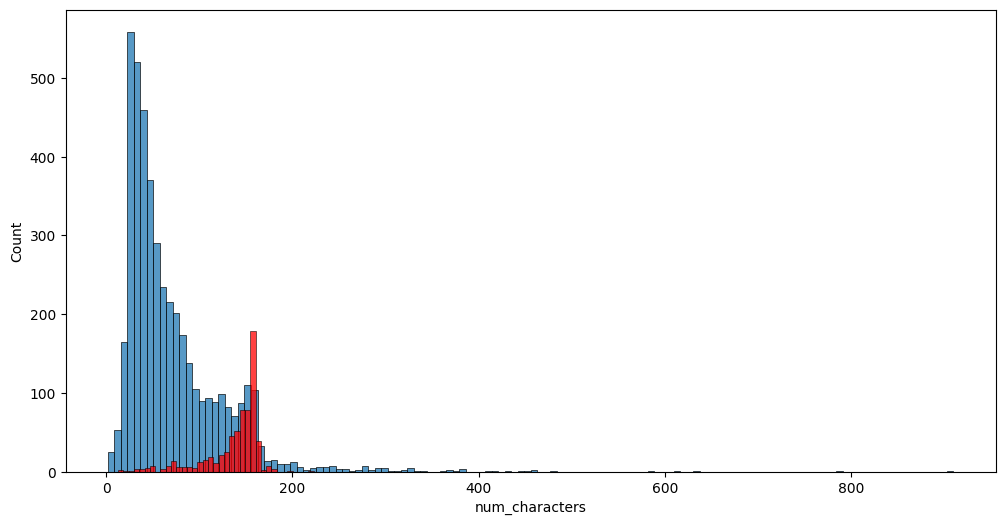

In [26]:
plt.figure(figsize = (12,6))
sb.histplot(df[df['target'] == 1]['num_characters']);
sb.histplot(df[df['target'] == 0]['num_characters'], color ='red' );

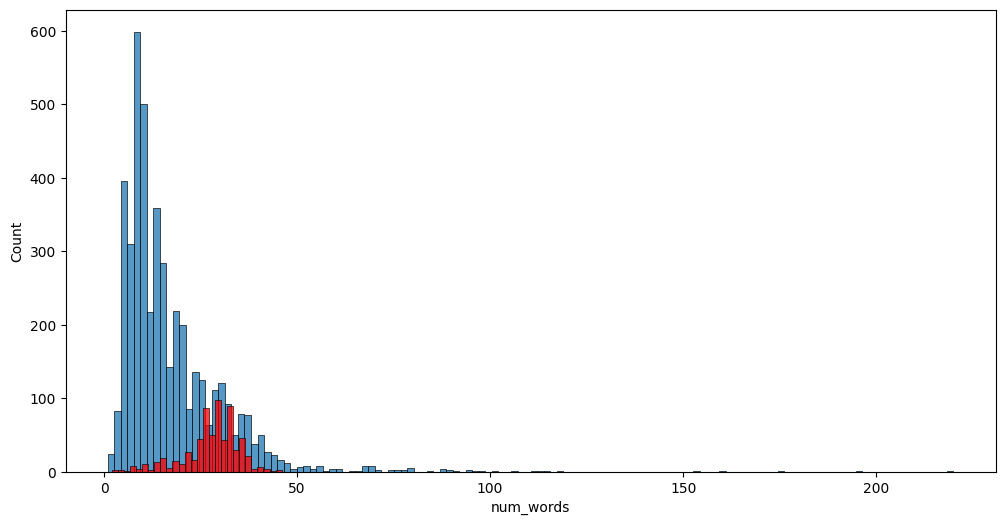

In [27]:
plt.figure(figsize = (12,6))
sb.histplot(df[df['target'] == 1]['num_words']);
sb.histplot(df[df['target'] == 0]['num_words'], color ='red' );

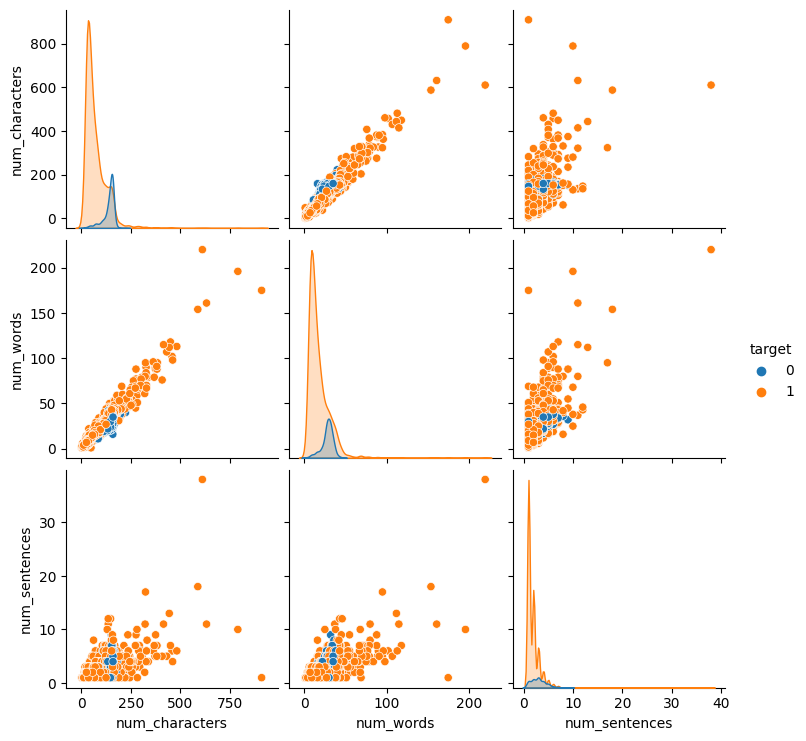

In [28]:
sb.pairplot(df, hue = 'target');

C:\Users\EMINENT_THINKER\AppData\Local\Temp\ipykernel_5204\370624539.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot = True)


<AxesSubplot: >

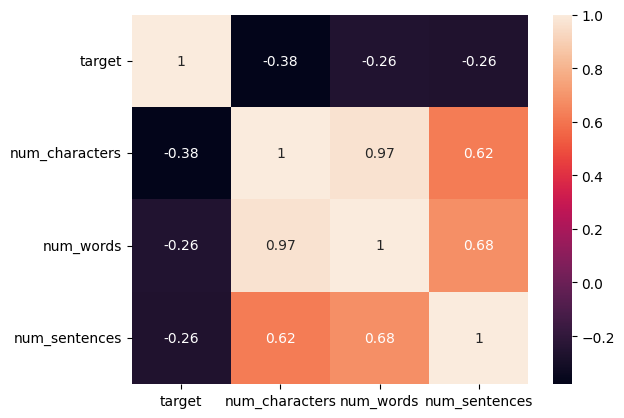

In [29]:
sb.heatmap(df.corr(), annot = True)

# 3. Data Preprocessing

In [30]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()

In [31]:
def transform_message(message):
    message = message.lower()
    words = nltk.word_tokenize(message)
    transformed_words =[]
    for x in words:
        if x not in stopwords.words('english') and x.isalnum():
            root_words = ps.stem(x)
            transformed_words.append(root_words)
    return ' '.join(transformed_words)

In [32]:
df['transformed_message'] = df['message'].apply(transform_message)
df.head()

,target,message,num_characters,num_words,num_sentences,transformed_message
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
from wordcloud import WordCloud
wc= WordCloud(width=700, height = 700, min_font_size=10, background_color='white')

In [34]:
ham_wc = wc.generate(df[df['target'] ==1]['transformed_message'].str.cat(sep = ' '))

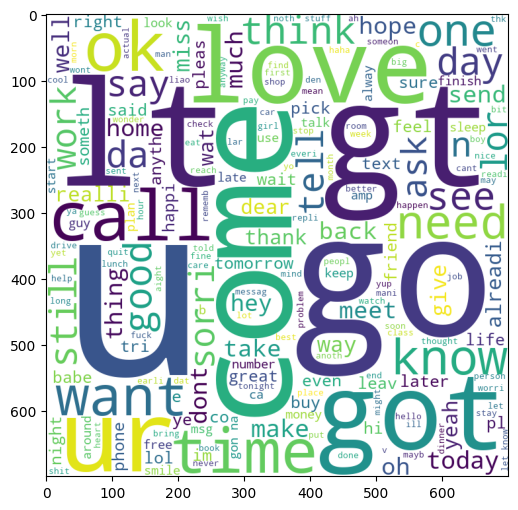

In [35]:
plt.figure(figsize = (12,6))
plt.imshow(ham_wc);

In [36]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_message'].str.cat(sep = ' '))

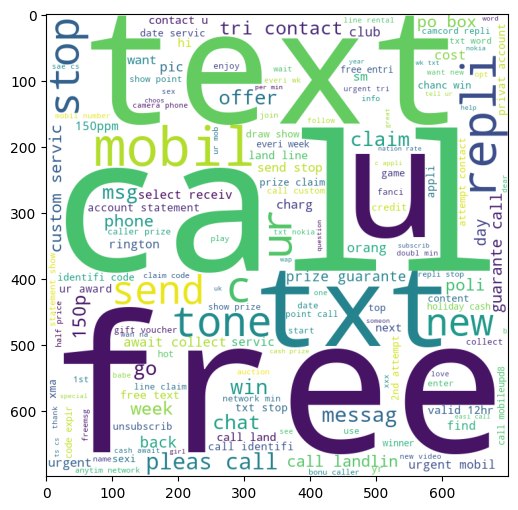

In [37]:
plt.figure(figsize = (12,6))
plt.imshow(ham_wc);

# 4. Model Building

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer

In [39]:
feature_extraction = TfidfVectorizer() 
cv = CountVectorizer(max_features = 6755)

In [40]:
X = cv.fit_transform(df.transformed_message).toarray()

In [41]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
X.shape

(5173, 6755)

In [43]:
y = df.target.values

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [46]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [47]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [48]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))      

0.8647342995169082
[[109  20]
 [120 786]]
0.9751861042183623


In [49]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9710144927536232
[[119  10]
 [ 20 886]]
0.9888392857142857


In [50]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9739130434782609
[[105  24]
 [  3 903]]
0.9741100323624595


In [51]:
# cv --> mnb

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [53]:
# svc = SVC(kernel= 'sigmoid', gamma = 1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lr = LogisticRegression(solver= 'liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50, random_state=42)
# abc = AdaBoostClassifier(n_estimators=50, random_state=42)
# bc = BaggingClassifier(n_estimators=50, random_state=42)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=42)
# gbc = GradientBoostingClassifier(n_estimators=50, random_state=42)


In [54]:
# def train_classifier(clf, X_train, X_test, y_train, y_test):
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     return accuracy, precision

In [55]:
# clfs = {'SVC': svc, 'KN' : knc, 'NB' : mnb, 'DTC' : dtc, 'LR' : lr, 'RFC' : rfc, 'AdaBoost' : abc, 'BgC' : bc, 'ETC' : etc,
#        'GBC' : gbc}

# accuracy_scores = []
# precision_scores = []
# for name, clf in clfs.items():
#      current_accuracy, current_precision = train_classifier(clf, X_train, X_test, y_train, y_test)
#      accuracy_scores.append(current_accuracy)
#      precision_scores.append(current_precision)
# performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores})
# performance_df = performance_df.sort_values('Precision', ascending= False)

In [56]:
# performance_df

In [57]:
# svc = SVC(kernel = 'sigmoid', gamma = 1.0, probability = True)
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators = 50, random_state = 42)
# from sklearn.ensemble import VotingClassifier
# voting = VotingClassifier(estimators = [('svm', svc), ('nb', mnb), ('etc', etc)], voting = 'soft')
# voting.fit(X_train, y_train)
# y_pred = voting.predict(X_test)
# print('Accuracy: ', accuracy_score(y_test, y_pred))
# print('Precision: ', precision_score(y_test, y_pred))

In [61]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0, probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 42)
from sklearn.ensemble import StackingClassifier
sc = StackingClassifier(estimators = [('svm', svc), ('nb', mnb), ('etc', etc)], final_estimator = RandomForestClassifier())
sc.fit(X_train, y_train)
y_pred =sc.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))

Accuracy:  0.9816425120772947
Precision:  0.9878987898789879


In [62]:
import pickle
pickle.dump(cv, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [ ]:
# from sklearn.externals import joblib
# joblib.dump(cv, "vectorizer.pkl")
# joblib.dump(sc, "model.pkl")